# 1.Panoramica del dataset

In [1]:
import pandas as pd
import numpy as np

import Preprocessing
import Graph

import NaturalLanguageProcessing
import Supervised

random_seed = 3

dataset = pd.read_csv("kindle_review.csv")
dataset.head()


,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [2]:
print('Dimensione del dataset: ', dataset.shape)

Dimensione del dataset:  (12000, 11)


# 2.Preprocessing del dataset

## Dataset cleaning

In [3]:


clean_dataset = Preprocessing.dataset_cleaning(dataset)

clean_dataset.head()

,rating,reviewText,summary
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,4,I did not expect this type of book to be in li...,Book


In [4]:
print('Dimensione del dataset processato: ', clean_dataset.shape)

Dimensione del dataset processato:  (12000, 3)


## Aggiunta della colonna sentiment

In [5]:
clean_dataset = Preprocessing.addSentimentColumn(clean_dataset)
clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,0
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,1
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,0
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,0
4,4,I did not expect this type of book to be in li...,Book,1


In [6]:
print('Numero occorrenze dei valori del sentimento:')
clean_dataset['sentiment'].value_counts()

Numero occorrenze dei valori del sentimento:


0    6000
1    6000
Name: sentiment, dtype: int64

## Grafico della distribuzione della colonna rating

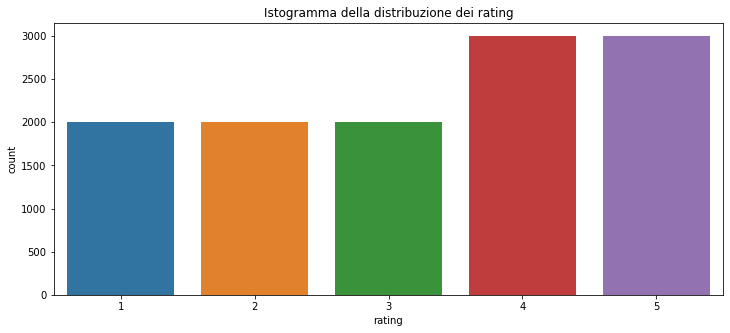

In [7]:


Graph.rating_distribution(clean_dataset)

## Grafico della distribuzione della colonna sentiment

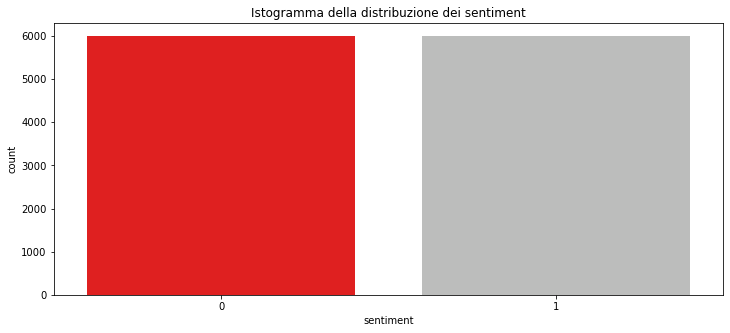

In [8]:
Graph.sentiment_distribution(clean_dataset)

# 3.Natural Language Processing

## Text Cleaning

### In questa sezione viene applicato il text cleaning della colonna reviewText, in cui vengono rimosse le stopword, i segni di punteggiatura e viene tokenizzato il testo

In [9]:


# rimozione dei segni di punteggiatura
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.remove_punctuation(text))

# rimozione delle stopword
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.remove_stopwords(text))

# lowering di ogni lettera
clean_dataset = NaturalLanguageProcessing.text_lowerer(clean_dataset, "reviewText")

# lemmatizzazione delle parole
clean_dataset["reviewText"] = clean_dataset["reviewText"].apply(lambda text: NaturalLanguageProcessing.lemmatize_words(text))

clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,jace rankin may short he nothing mess man haul...,Entertaining But Average,0
1,5,great short read i didnt want put i read one s...,Terrific menage scenes!,1
2,3,ill start say first four book i wasnt expect 3...,Snapdragon Alley,0
3,3,aggie angela lansbury carry pocketbook instead...,very light murder cozy,0
4,4,i expect type book library please find price r...,Book,1


### In questa sezione viene applicato il text cleaning della colonna summary, in cui vengono rimosse le stopword, i segni di punteggiatura e viene tokenizzato il testo

In [10]:
# rimozione dei segni di punteggiatura
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: NaturalLanguageProcessing.remove_punctuation(text))

# rimozione delle stopword
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: NaturalLanguageProcessing.remove_stopwords(text))

# lowering di ogni lettera
clean_dataset = NaturalLanguageProcessing.text_lowerer(clean_dataset, "summary")

# lemmatizzazione delle parole
clean_dataset["summary"] = clean_dataset["summary"].apply(lambda text: NaturalLanguageProcessing.lemmatize_words(text))

clean_dataset.head()

,rating,reviewText,summary,sentiment
0,3,jace rankin may short he nothing mess man haul...,entertain but average,0
1,5,great short read i didnt want put i read one s...,terrific menage scene,1
2,3,ill start say first four book i wasnt expect 3...,snapdragon alley,0
3,3,aggie angela lansbury carry pocketbook instead...,light murder cozy,0
4,4,i expect type book library please find price r...,book,1


## Integrazione della conoscenza

### In questa sezione viene viene integrata la conoscenza, creando 4 colonne che indicano il numero di parole positive e negative per le colonne reviewText e summary

In [11]:
# aggiunta delle colonne dei conteggi
clean_dataset = Preprocessing.addNumberPositiveReview(clean_dataset)
clean_dataset = Preprocessing.addNumberNegativeReview(clean_dataset)

clean_dataset = Preprocessing.addNumberPositiveSummary(clean_dataset)
clean_dataset = Preprocessing.addNumberNegativeSummary(clean_dataset)


In [12]:
# calcolo numero parole positive/negative della colonna reviewText
list_word = []
with open('positive_words.txt') as file:
        list_word = file.read().split()
clean_dataset["numberPositiveReview"] = clean_dataset["reviewText"].apply(lambda text: Preprocessing.countWords(list_word, text))

with open('negative_words.txt') as file:
        list_word = file.read().split()
clean_dataset["numberNegativeReview"] = clean_dataset["reviewText"].apply(lambda text: Preprocessing.countWords(list_word, text))


In [13]:
# calcolo numero parole positive/negative della colonna summary
list_word = []
with open('positive_words.txt') as file:
        list_word = file.read().split()
clean_dataset["numberPositiveSummary"] = clean_dataset["summary"].apply(lambda text: Preprocessing.countWords(list_word, text))

with open('negative_words.txt') as file:
        list_word = file.read().split()
clean_dataset["numberNegativeSummary"] = clean_dataset["summary"].apply(lambda text: Preprocessing.countWords(list_word, text))

clean_dataset.head()

,rating,reviewText,summary,sentiment,numberPositiveReview,numberNegativeReview,numberPositiveSummary,numberNegativeSummary
0,3,jace rankin may short he nothing mess man haul...,entertain but average,0,16,31,1,0
1,5,great short read i didnt want put i read one s...,terrific menage scene,1,7,1,1,0
2,3,ill start say first four book i wasnt expect 3...,snapdragon alley,0,2,1,0,0
3,3,aggie angela lansbury carry pocketbook instead...,light murder cozy,0,3,4,1,1
4,4,i expect type book library please find price r...,book,1,1,0,0,0


In [14]:
clean_dataset.to_csv('clean_dataset.csv')


### Creazione dataset con rappresentazione tf-idf

In [15]:
dataset, labels = Supervised.createDataframeWithTfIdf(clean_dataset)

# 4.Algoritmi supervisionati

## In questa sezione vengono applicati gli algoritmi supervisionati

### Qui viene applicato l'algoritmo supervisionato RandomForest, utilizzato per effettuare la feature selection

In [16]:
# feature selection tramite random forest
truncated_df = Supervised.randomForest_featureSelection(dataset, labels)


Numero feature selezionate: 3333


In [17]:
# hyperparameter tuning del random forest
rf = Supervised.randomForest_parameterTuning(truncated_df, labels)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=40; total time=   0.8s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=40; total time=   0.8s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=40; total time=   0.8s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60; total time=   1.1s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60; total time=   1.1s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60; total time=   1.1s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=15, n

[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=60; total time=   0.7s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=60; total time=   0.8s
[CV] END criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=30, min_samples_split=30, n_estimators=60; total time=   0.7s
[CV] END criterion=

[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=40; total time=   0.5s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=60; total time=   0.7s
[CV] END criterion=entropy, max_depth=55, max_features=log2, min_samples_leaf=30, min_samples_split=15, n_estimators=60; total time=   0.6s
[CV] END criterion

[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=40; total time=   0.6s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=30, n_estimators=60; total time=   0.7s
[CV

In [18]:
best_param = rf.best_params_
print("Parametri migliori trovati:\n")
for pair in best_param.items():
    print(pair)

Parametri migliori trovati:

('criterion', 'entropy')
('max_depth', None)
('max_features', 'log2')
('min_samples_leaf', 5)
('min_samples_split', 15)
('n_estimators', 80)


In [19]:
df_cv_results = pd.DataFrame(rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results[:10]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
50,1,0.803342,0.892502,80,15,5,log2,None,entropy
54,2,0.800926,0.891922,80,30,5,log2,None,entropy
26,3,0.800195,0.881553,80,15,5,log2,55,entropy
27,4,0.800083,0.884305,100,15,5,log2,55,entropy
49,5,0.798968,0.890887,60,15,5,log2,None,entropy
51,6,0.797713,0.893800,100,15,5,log2,None,entropy
55,7,0.796884,0.893119,100,30,5,log2,None,entropy
6,8,0.796739,0.867824,80,30,5,log2,35,entropy
30,9,0.796547,0.881073,80,30,5,log2,55,entropy
3,10,0.796420,0.872981,100,15,5,log2,35,entropy


In [20]:
# applico randomForest completo (featureSelection e hyperparameterTuning)
rf = Supervised.randomForest(truncated_df, labels, best_param)

Accuracy: 0.8029166666666666
              precision    recall  f1-score   support

    Negativo       0.80      0.81      0.81      1213
    Positivo       0.80      0.80      0.80      1187

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

K cross validation, k=  10
Average scores:  0.8025833333333333
Standard Deviation of scores:  0.009877373132569195



K cross validation, k=  11
Average scores:  0.8031674730469708
Standard Deviation of scores:  0.008775096285340936



K cross validation, k=  12
Average scores:  0.80275
Standard Deviation of scores:  0.007001487937098316



K cross validation, k=  13
Average scores:  0.80624954676959
Standard Deviation of scores:  0.01165160066126534



K cross validation, k=  14
Average scores:  0.8037503142520646
Standard Deviation of scores:  0.011265797620355561



K cross validation, k=  15
Average scores:  0.8053333333333335
Stand

### Classificatore bayesiano

In [21]:
#Supervised.multinomialNaiveBayes(truncated_df, labels)


### Classificatore KNN

9
train:  0.7157291666666666
test:  0.6625
11
train:  0.7013541666666666
test:  0.6654166666666667
13
train:  0.69625
test:  0.6604166666666667
15
train:  0.6953125
test:  0.6658333333333334
17
train:  0.6926041666666667
test:  0.665
19
train:  0.6895833333333333
test:  0.66375
97
train:  0.6790625
test:  0.6758333333333333
[0.3375, 0.33458333333333334, 0.33958333333333335, 0.33416666666666667, 0.335, 0.33625, 0.32416666666666666]
0.6616666666666666
              precision    recall  f1-score   support

    Negativo       0.71      0.57      0.63      1213
    Positivo       0.63      0.76      0.69      1187

    accuracy                           0.66      2400
   macro avg       0.67      0.66      0.66      2400
weighted avg       0.67      0.66      0.66      2400

K cross validation, k=  10
Average scores:  0.6599999999999999
Standard Deviation of scores:  0.017993054215446575



K cross validation, k=  11
Average scores:  0.6589987531620072
Standard Deviation of scores:  0.01515

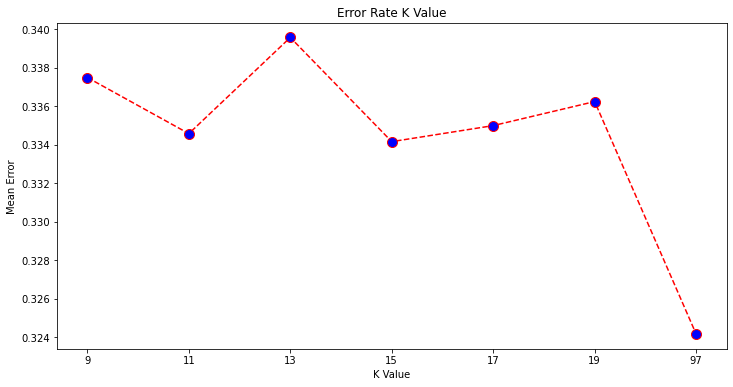

In [22]:
Supervised.knn(truncated_df, labels)

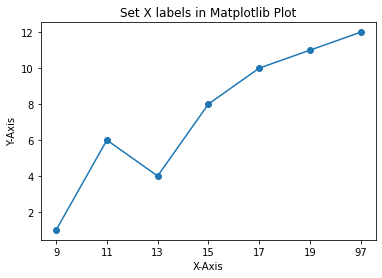

In [23]:
#import importlib
#importlib.reload(nameOfModule)